In [1]:
import numpy as np
import scipy.linalg
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
with open("./data/karate_club/karate_club.txt","r") as f:
    for i,line in enumerate(f):
        tmp = line.rstrip("\n")
        if i == 1:
            N = int(tmp.split(" ")[-1])
            X = np.zeros((N,N))
            print(N)
        elif i > 1:
            node1,node2 = map(int,tmp.split(" "))  
            X[node1-1][node2-1] = X[node2-1][node1-1] = 1
            

34


In [25]:
X

array([[ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

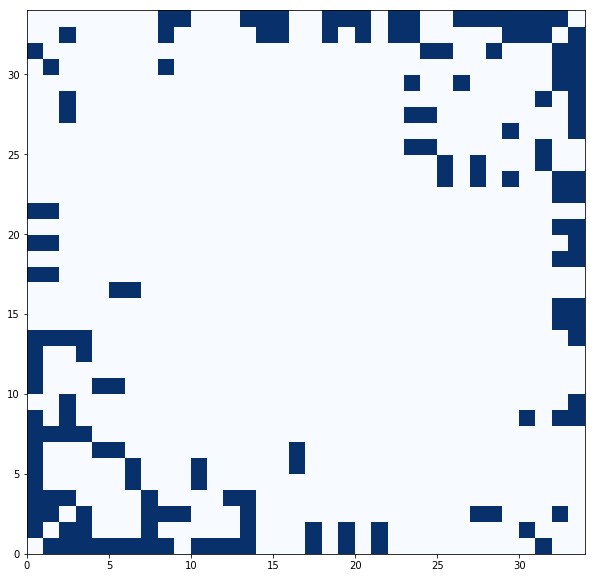

In [59]:
def plot_matrix(matrix, clusters=None):
    f, ax = plt.subplots(figsize=(10, 10))
    plt.pcolor(matrix, cmap=plt.cm.Blues )

    if not clusters is None:
        clusters_diff = np.r_[[0], np.diff(clusters)]
        for i,c in enumerate(clusters_diff):
            if c==1:
                ax.axhline(i, c="grey") #, linewidth=1)
                ax.axvline(i, c="grey")#, linewidth=1)
    plt.show()

plot_matrix(X)

In [60]:
from sklearn.cluster import KMeans
D = np.diag(np.sum(X,axis=1))
L = D-X
eigen_value,eigen_vector = scipy.linalg.eigh(L,eigvals=(0,1))

kmeans_model = KMeans(n_clusters=2, random_state=10).fit(eigen_vector)

# 分類先となったラベルを取得する
labels = kmeans_model.labels_

index = []
cnt = 0
for i,label in enumerate(labels):
    if label==0:
        index = [i] + index
        cnt += 1
    else:
        index = index + [i]
print(cnt)

X_sorted = np.zeros((N,N))
print(index)
for j,id in enumerate(index):
    X_sorted[j,:] = X[id,:]


        

24
[33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 20, 19, 18, 15, 14, 13, 9, 8, 7, 3, 2, 1, 0, 4, 5, 6, 10, 11, 12, 16, 17, 21]


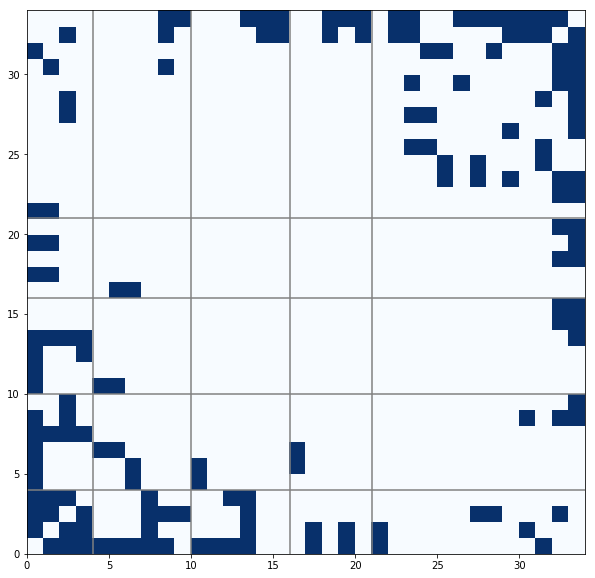

In [63]:
plot_matrix(X,labels)